# Hello, this is the beginning of my attempt to read this file! Enjoy :)

In [1]:
#here are all my imports
import pandas as pd

In [15]:
taxi14 = pd.read_csv("data/nyc_taxi_data_2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
taxi14.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [5]:
taxi14.shape

(14999999, 18)

In [ ]:
##we dont need to rename any of the columns

In [4]:
taxi14.dtypes

vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

## Data QA

### Check for duplictes

In [ ]:
taxi14['unique_model'] = taxi14.vendor_id.str.cat(
    [taxi14.pickup_datetime.apply(str), taxi14.dropoff_datetime.apply(str)],sep='-')

In [ ]:
taxi14[["vendor_id", "pickup_datetime", "dropoff_datetime", "unique_model"]].head()

In [ ]:
taxi14.unique_model.value_counts()

In [ ]:
taxi14[taxi14.unique_model=='VTS-2014-01-22 14:21:00-2014-01-22 14:21:00'].head()

In [ ]:
taxi14[taxi14.duplicated()].shape

In [16]:
taxi14 = taxi14.drop_duplicates()
taxi14.shape

(14999901, 18)

In [ ]:
del taxi14['unique_model']

### Check for missing values

In [ ]:
n_records = len(taxi14)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(taxi14)

In [ ]:
taxi14.store_and_fwd_flag.value_counts()

In [ ]:
taxi14.store_and_fwd_flag.isnull().sum()

In [18]:
del taxi14['store_and_fwd_flag']

In [17]:
taxi14 = taxi14.dropna(subset=["dropoff_longitude", "dropoff_latitude"])

taxi14.shape

(14999756, 18)

### Check for outliers

In [9]:
taxi14.vendor_id.value_counts()

VTS    7634795
CMT    7364961
Name: vendor_id, dtype: int64

In [22]:
taxi14.passenger_count.value_counts()

1      10602609
2       2046971
5        860368
3        611903
6        589030
4        288702
0           124
208          19
9            18
7             7
8             5
Name: passenger_count, dtype: int64

In [23]:
taxi14 = taxi14[(taxi14.passenger_count > 0) & (taxi14.passenger_count < 7)]

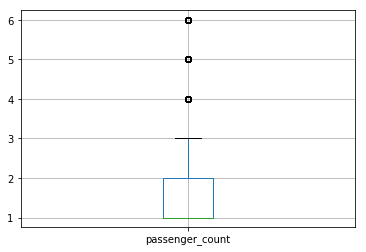

In [24]:
taxi14.boxplot(column='passenger_count')

In [25]:
taxi14 = taxi14[taxi14.passenger_count < 6]

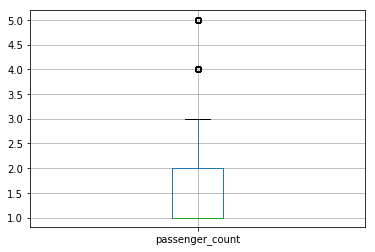

In [26]:
taxi14.boxplot(column='passenger_count')

In [ ]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype == np.float:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(taxi14)

## Exploring data types

In [ ]:
for col in ['vendor_id', 'playgrounds', 'sports', 'roading']:
    public[col] = public[col].astype('category')

In [ ]:
taxi14['pickup_datetime'] =  pd.to_datetime(taxi14['pickup_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
taxi14['dropoff_datetime']= pd.to_datetime(taxi14['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

## Preliminary data visualization

In [ ]:
import matplotlib.pyplot as plt
taxi14.plot.scatter(x="passenger_count", y="trip_distance");
plt.show()

In [ ]:
taxi14.trip_distance.plot.hist(xlim=(0,35));

In [ ]:
taxi14.passenger_count.plot.kde();

In [ ]:
ttlamount_by_passenger = taxi14.groupby("passenger_count")["total_amount"].mean()
ttlamount_by_passenger.head()
ttlamount_by_passenger.head(10).plot.barh();

In [ ]:
taxi14.vendor_id.value_counts().plot.pie();

ignore this.


ndf = taxi14['pickup_datetime'].str.split(' ',expand=True).rename(columns={0:"pickup_date", 1:'pickup_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['pickup_datetime'],1)

ndf = taxi14['dropoff_datetime'].str.split(' ',expand=True).rename(columns={0:"dropoff_date", 1:'dropoff_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['dropoff_datetime'],1) ##

#split the date and time on the space abd delete the original columns